# Analisis Data Listing Airbnb Bangkok

## Latar Belakang

Perusahaan penyewaan dan penginapan rumah berbasis daring asal Amerika Serikat, Airbnb, mencoba untuk menganalisis hasil operasionalnya, terutama di Kota Bangkok, Thailand, yang menjadi kawah candradimuka pariwisata di seantero Asia Tenggara.

### Pernyataan Masalah

Airbnb ingin mengevaluasi performa dan kinerja mitra mereka di Bangkok demi meningkatkan keuntungan perusahaan dengan menganalisis data tersedia. Sehingga, dengan pengerjaan analisis ini, analisis yang dihasilkan bisa berguna bagi perusahaan Airbnb dan mitranya di Bangkok dengan pemetaan data sederhana dan implikasi tersirat yang bisa dipetik dari visualisasi data yang dihasilkan.

### *Library* yang Digunakan

Untuk menunjang analisis dan visualisasi data, beberapa *library* yang terintegrasi dengan python digunakan, seperti Pandas, Numpy, Seaborn, Scipy, dan Matplotlib.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, zscore

### Data yang Digunakan

Untuk menjawab permasalahan tersebut, langkah yang ditempuh ialah mendapatkan data yang sekiranya bisa diproses dan diolah lebih lanjut, dengan bermodalkan data dalam bentuk character separated values (CSV), yang disertakan pada folder ini dan bersumber dari [link ini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF).

Set data ini terdiri dari beberapa kolom terkait hunian sewa (*listing*) Airbnb di Bangkok, yang terdiri dari:

* `id` : ID berupa bilangan bulat yang bersifat unik untuk setiap *listing* Airbnb.
* `name` : Nama *listing* dalam bentuk *string*.
* `host_id` : ID berupa bilangan bulat yang bersifat unik untuk setiap mitra/pengguna.
* `host_name` : Nama mitra/pengguna dalam bentuk *string*.
* `neighbourhood` : Nama distrik/khet tempat *listing* berada dalam bentuk *string*.
* `latitude` : Bilangan desimal yang menunjukkan lintang koordinat hunian sewa.
* `longitude` : Bilangan desimal yang menunjukkan bujur koordinat hunian sewa.
* `room_type` : *String* yang menujukkan kategorisasi tipe *listing* tersebut yang terdiri dari empat jenis:
    * Shared room (ruang bersama) : Hunian sewa berupa rumah yang bisa dipakai untuk lebih dari satu penyewa pada ruangan yang sama.
    * Private room (ruang sendiri) : Hunian sewa berupa rumah yang bisa dipakai untuk lebih dari satu penyewa pada ruangan yang berbeda.
    * Entire home/apt (seluruh rumah/apartemen) : Hunian sewa berupa rumah yang hanya bisa dipakai untuk satu penyewa dengan menyewa seutuhnya.
    * Hotel room (ruangan hotel) : Hunian sewa berupa kamar hotel pada umumnya.
* `price` : Bilangan bulat yang menunjukkan harga sewa hunian.
* `minimum_nights` : Bilangan bulat yang menyatakan durasi minimal penyewaan hunian tersebut dalam satuan malam.
* `number_of_reviews` : Bilangan bulat yang menyatakan banyaknya ulasan yang didapatkan untuk hunian sewa tersebut.
* `last_review` : Tanggal ulasan terakhir yang diberikan pada hunian sewa tersebut.
* `reviews_per_month` : Bilangan desimal yang menunjukkan rerata banyaknya ulasan yang didapatkan setiap bulannya.
* `calculated_host_listings_count` : Bilangan bulat yang menyatakan jumlah hunian sewa yang dimiliki oleh mitra/pengguna pada daerah tersebut.
* `availability_365` : Bilangan bulat yang menyatakan jumlah hari ketersediaan hunian untuk disewa dalam setahun.
* `number_of_reviews_ltm` : Bilangan bulat yang menyatakan banyaknya ulasan yang didapatkan untuk hunian sewa tersebut pada 12 bulan terakhir.

Berikut tampilan data untuk 5 baris teratas dan 5 baris terbawah untuk set data tersebut dengan keseluruhan terdapat 15.854 baris:

In [66]:
df = pd.read_csv('Airbnb Listings Bangkok.csv', index_col = 0)
display(df)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## Analisis Data Eksplorasi Pra-Pembersihan

Pada bagian ini, serangkaian ekstrasi informasi dilakukan untuk mengambil baik secara deskriptif maupun secara inferensial. Terdapat beberapa rangkaian prosesi yakni *data profiling* dan uji normalitas baik dengan visualisasi maupun dengan uji statistik.

### Cek Statistik Deskriptif

Untuk menarik titik tendensi penting pada setiap fitur di data, *running code* yang digunakan ialah sebagai berikut:

In [67]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


### Uji Normalitas dengan Tes Statistik

Uji normalitas berguna untuk mengecek apakah distribusi data tersebar mengikuti distribusi normal atau tidak, sehingga bisa ditelaah titik sentral tendensi mana yang cocok untuk didapat dan diolah jika memunginkan. Pada kasus ini, digunakan tes uji statistik D'Agostino-Pearson karena tidak terpengaruh ukuran sampel, tidak seperti Shapiro-Wilk yang disebut paling *powerful* untuk setiap jenis distribusi dan ukuran sampel [(Razali & Wah, 2011)](https://web.archive.org/web/20150630110326/http://instatmy.org.my/downloads/e-jurnal%202/3.pdf), namun tidak cocok jika ukuran sampelnya melebihi 5.000 sampel.

In [68]:
df_numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

result = {'column': [], 'p-value': [], 'normality': []}

for column in df_numeric_columns:
    if (column not in ['id', 'host_id', 'latitude', 'longitude']):
        dp_statistic, df_pvalue = normaltest(df[column].dropna())
        result['column'].append(column)
        result['p-value'].append(df_pvalue)
        result['normality'].append('not normal' if df_pvalue < 0.05 else 'normal')

display(pd.DataFrame(result))

,column,p-value,normality
0,price,0.0,not normal
1,minimum_nights,0.0,not normal
2,number_of_reviews,0.0,not normal
3,reviews_per_month,0.0,not normal
4,calculated_host_listings_count,0.0,not normal
5,availability_365,0.0,not normal
6,number_of_reviews_ltm,0.0,not normal


Kesimpulan yang bisa diambil ialah semua distribusi pada setiap fitur bersifat tidak normal, sehingga jika ada hal yang menyangkut dari *central tendency* hingga sebaran data, perlu perlakuan yang mengakomodasi ketidaknormalan distribusi setiap fitur tersebut.

### Uji Normalitas dengan Visualisasi

Selain uji statisik, tes kenormalan distribusi bisa dipantau via tampilan frekuensi data yang bisa di-*plot* baik dalam bentuk histogram maupun dalam bentuk *boxplot* yang bisa dicek pada tampilan di bawah ini.

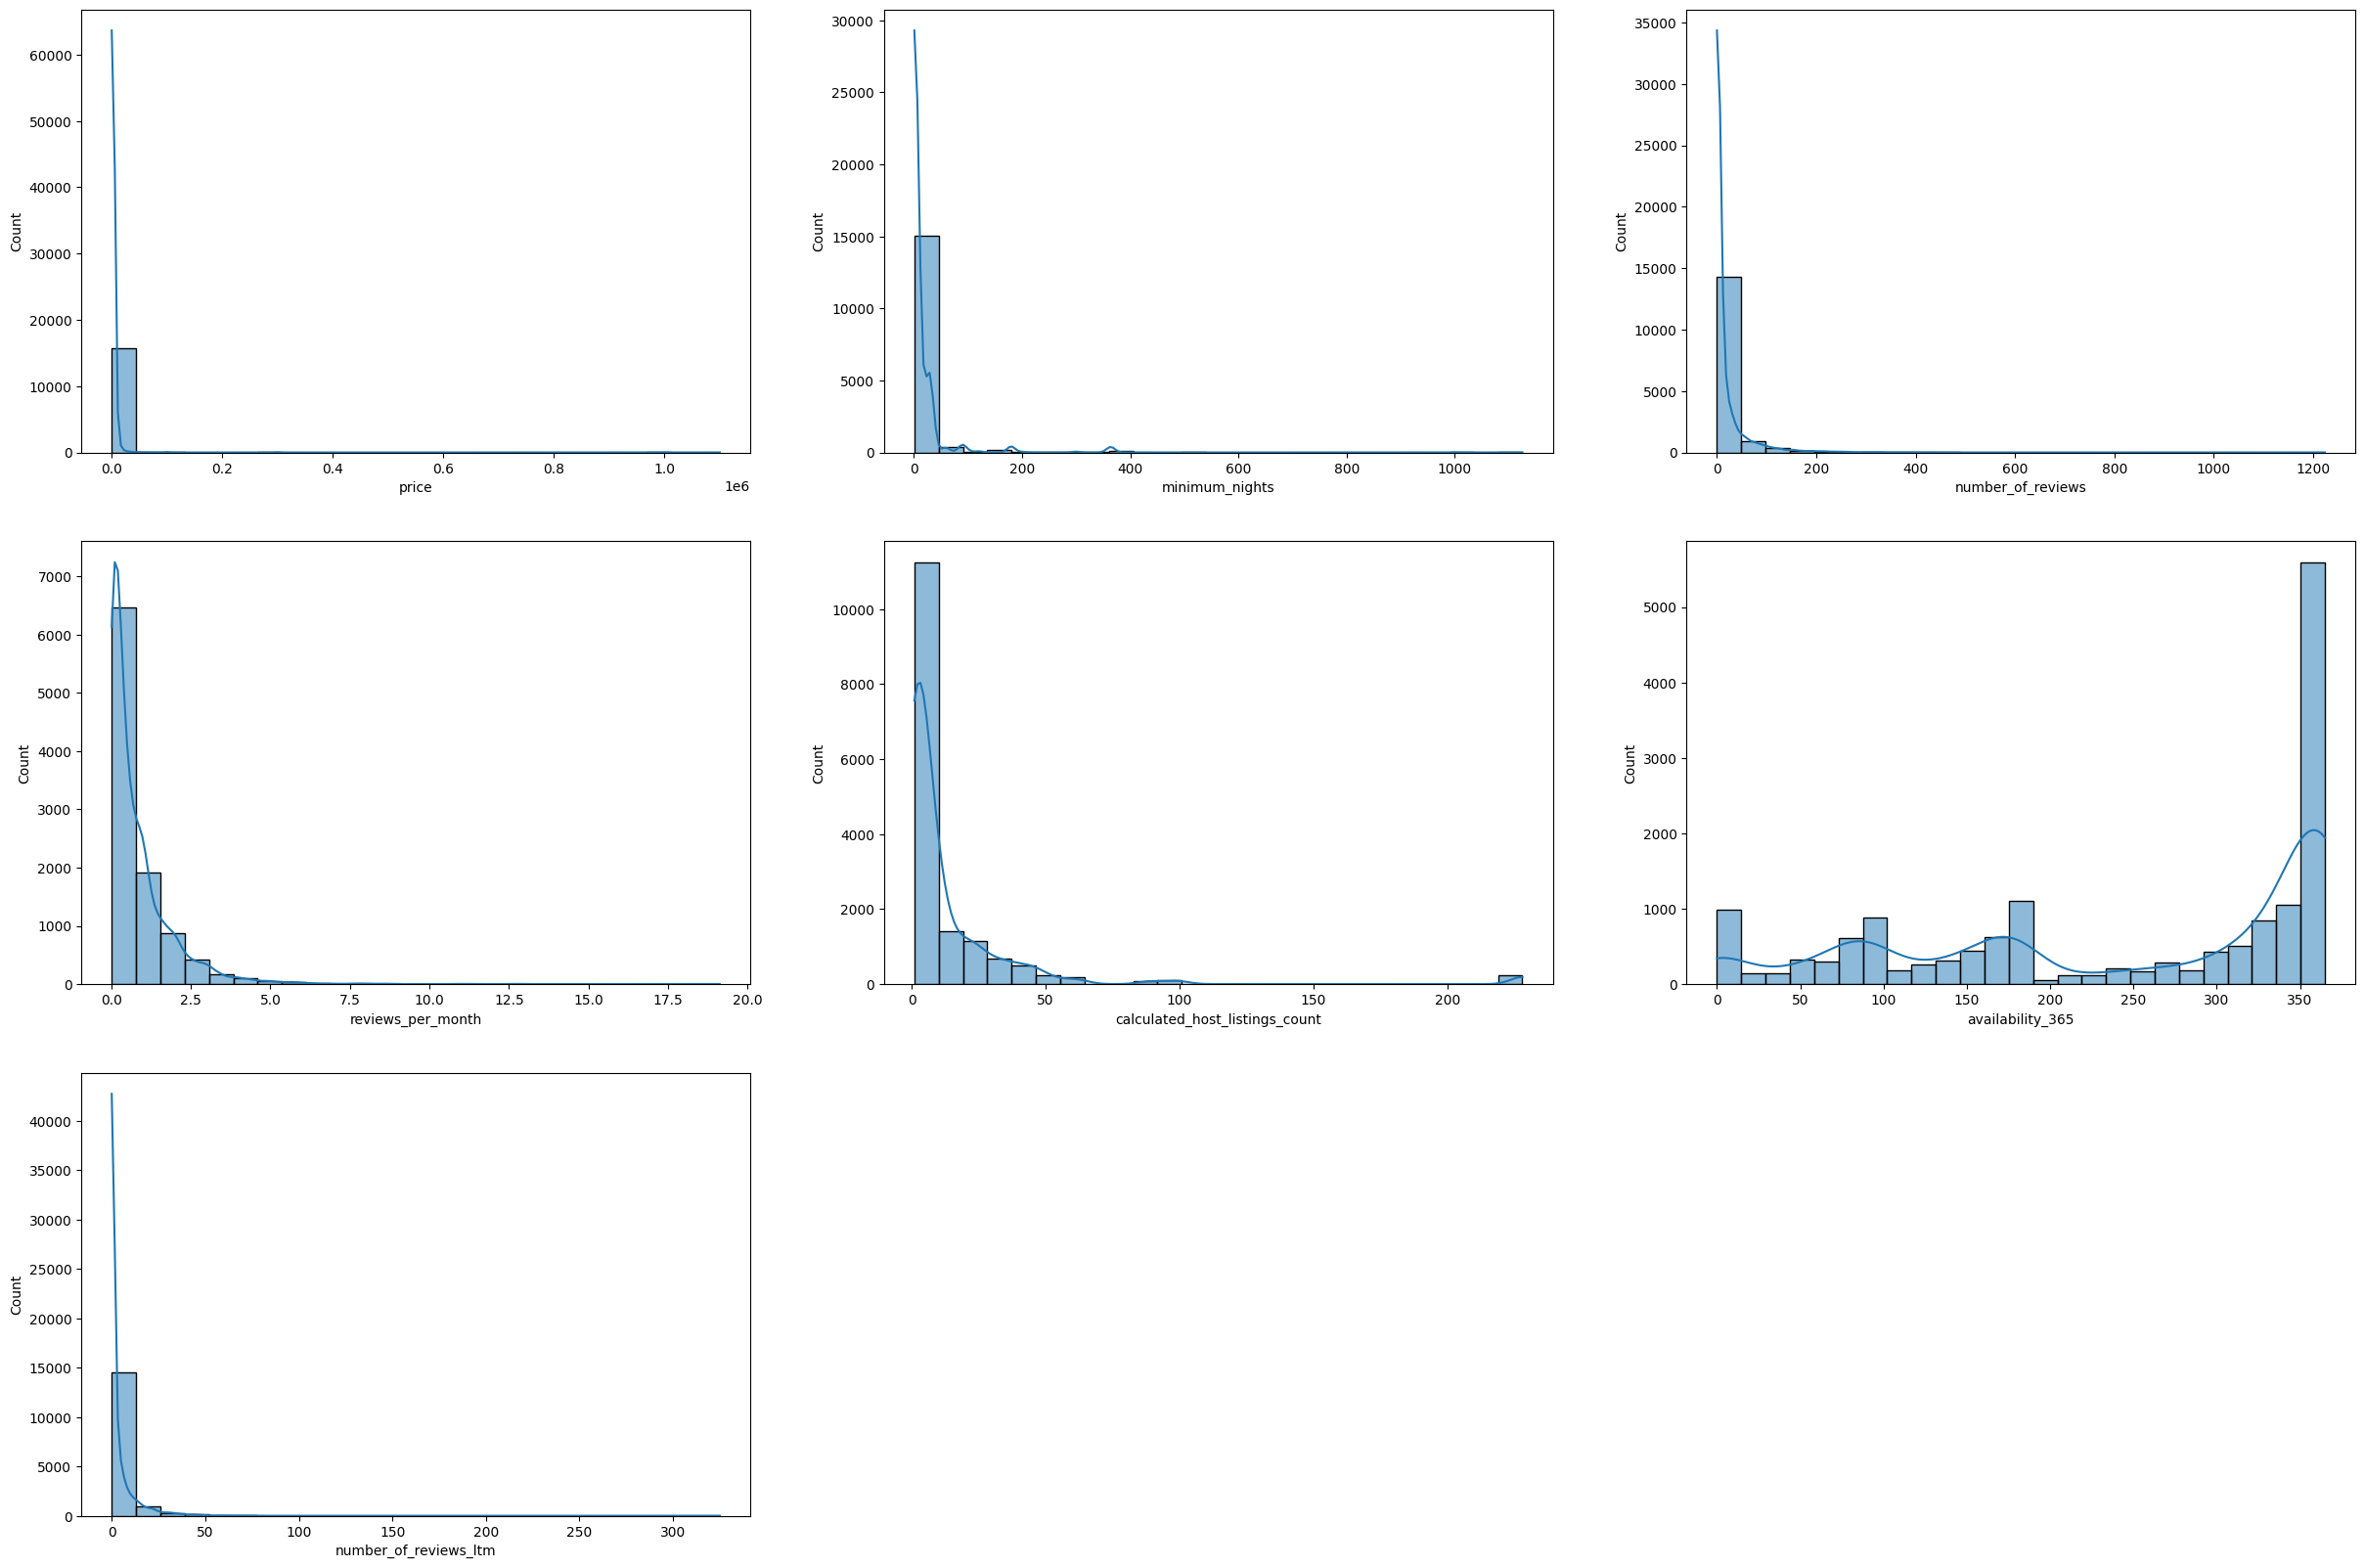

In [69]:
fig, axes = plt.subplots(3, 3, figsize = (30, 20))
plotPoint = 0

for column in df_numeric_columns:
    if (column not in ['id', 'host_id', 'latitude', 'longitude']):
        rowNum = plotPoint // 3
        colNum = plotPoint % 3
        sns.histplot(data = df[column].dropna(), kde = True, ax = axes[rowNum, colNum], bins = 25)
        plotPoint += 1
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.show()

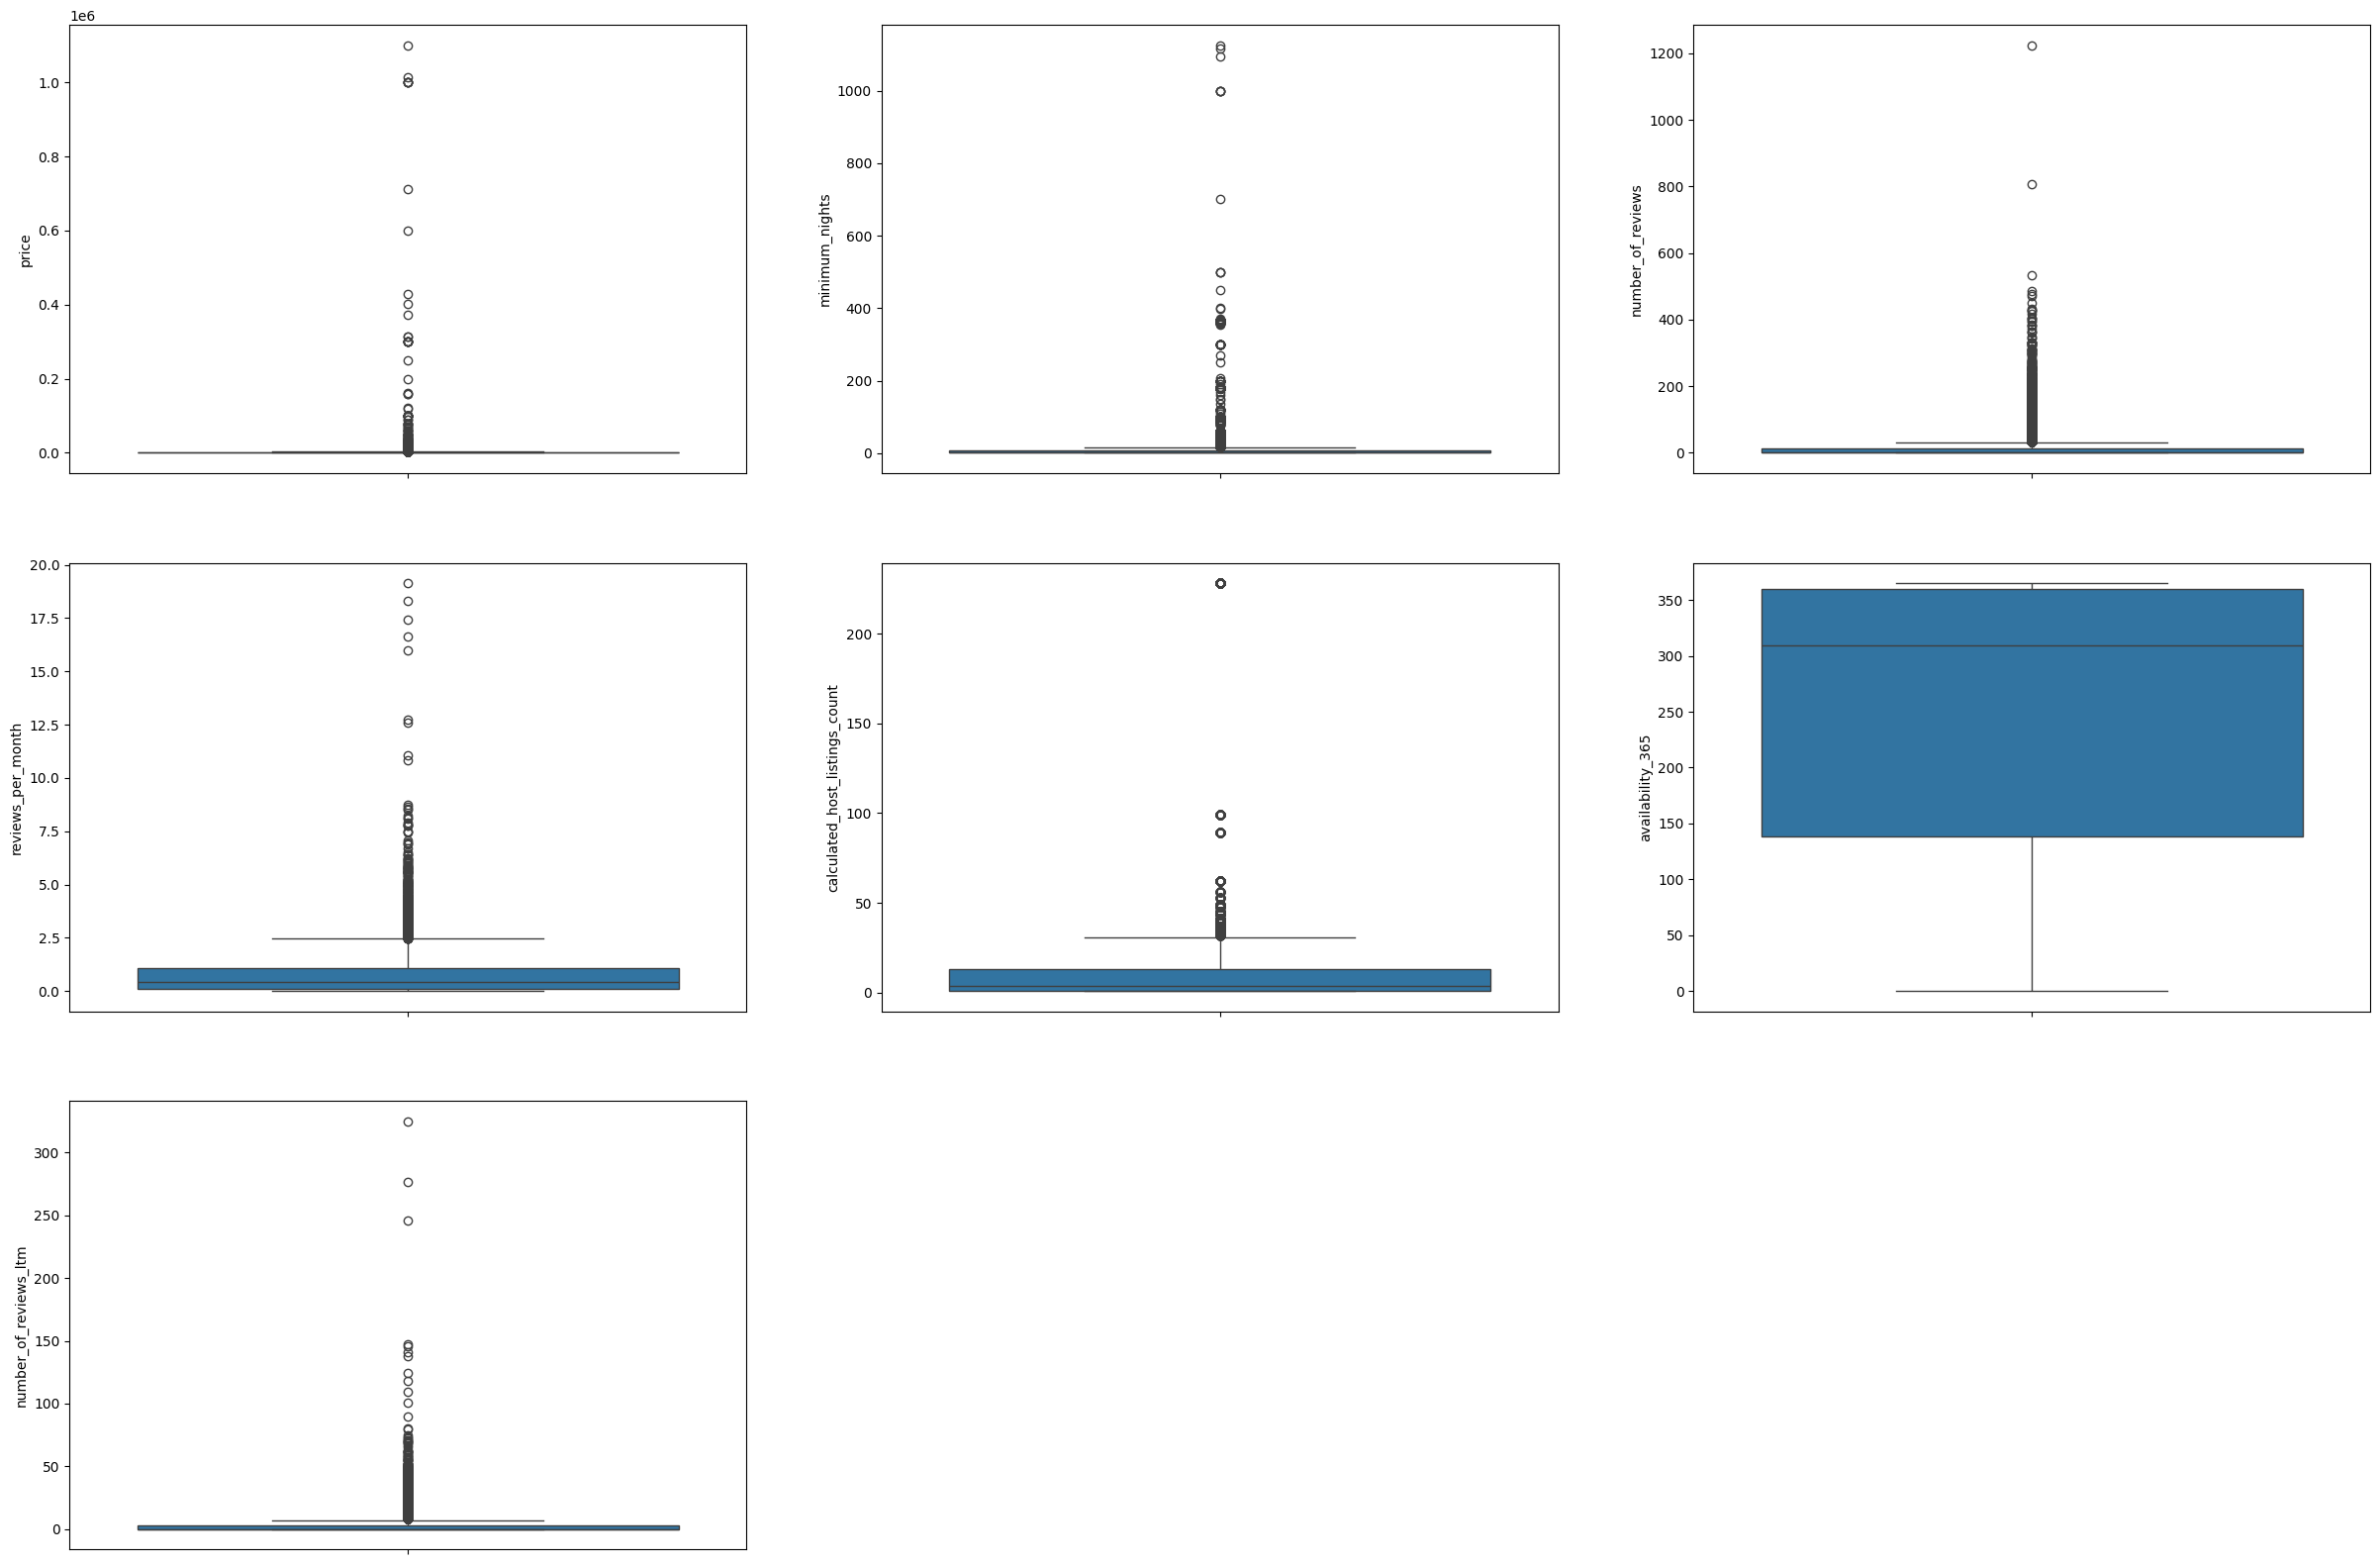

In [70]:
fig, axes = plt.subplots(3, 3, figsize = (30, 20))
plotPoint = 0

for column in df_numeric_columns:
    if (column not in ['id', 'host_id', 'latitude', 'longitude']):
        rowNum = plotPoint // 3
        colNum = plotPoint % 3
        sns.boxplot(data = df[column].dropna(), ax = axes[rowNum, colNum])
        plotPoint += 1
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.show()

Dengan demikian, kesimpulan yang bisa diambil dari visualisasi ialah uji kenormalan dengan cara ini juga menjadi justifikasi dari uji kenormalan dengan tes statistik sebelumnya. Hal ini juga bisa diperkuat dengan temuan fakta bahwa setidaknya pada setiap fitur atau kolom didapatkan distribusi data yang tidak normal. Seperti contoh, pada kolom harga sewa *listing*, didapatkan sebaran yang cukup lebar, dari rerata harga sewa yang hanya sekitar 3.000 baht, ada simpangan terlalu jauh dengan harga sewa maksimum yang mencapai 1.000.000 baht.

## Data dan Pembersihannya

### Pemahaman Data

Untuk memudahkan serta menjaga koridor analisis sesuai peruntukannya, langkah selanjutnya yang diambil ialah terlebih dahulu mengenal dan memahami data. Dengan proses ini, anomali yang terdapat pada data bisa diketahui dan akan bisa ditangani pada proses selanjutnya, yakni pembersihan data dengan landasan dan alasan secara statistikal dan berkaitan dengan data yang ditangani juga.

Sebelumnya, info lebih lanjut untuk data perlu ditampilkan. Lantas, berikut penjabaran informasi datanya pada beberapa tampilan di bawah seperti tipe data dan perhitungan baris yang tidak memuat data yang hilang:

In [71]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               10064

None

Serta, berikut adalah detail sampel data pada setiap baris per kolom dan perhitungan banyaknya nilai pada data yang berbeda-beda:

In [72]:
pd.set_option('display.max_colwidth', 0)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
df_tabledesc = pd.DataFrame(columns = ['Column Name', 'Number of Unique', 'Unique Sample'], data = listItem)
display(df_tabledesc)

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 b

Ada beberapa poin yang bisa terlihat dari paparan tampilan informasi data di atas, yakni sebagai berikut:
* Set data tersebut memiliki 16 kolom dan 15.854 baris dan telah dilengkapi dengan penjelasan data pada *file* berekstensi PDF, sehingga tidak menimbulkan masalah interpretabilitas.
* Ada beberapa kolom yang tidak memuat tipe data sesuai peruntukannya, seperti `last_review` yang seharusnya menggunakan tipe data *datetime object*, dan galat yang cukup minor untuk kasus ini yakni `room_type` dan `neighbourhood` yang cocok dengan tipe data *category* dengan keunggulan seperti [penggunaan memori yang cukup rendah](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical-memory).
* Beberapa kolom seperti `name` dan `host_name` tidak memiliki standaridasi dalam penggunaan bahasa yang dipakai, terlihat dari beberapa data yang menggunakan aksara Thai dan Mandarin yang disederhanakan, serta simbol-simbol yang tidak ada dalam aksara mana pun. Namun, untuk kasus ini, karena tidak ada analisis yang melibatkan pemodelan dari data, dan hanya ingin mengetahui kata yang berulang dengan menggunakan bantuan *word cloud*, penyeragaman aksara tidak menjadi hal yang *urgent* pada analisis ini. Setidaknya, pada dua kolom ini, penyederhanaan yang digunakan ialah penyeragaman beberapa karakter seperti *\n* (*newline*) dan *\r* (*carriage return*) jadi *whitespace* biasa untuk memudahkan analisis dengan *word cloud*.
* Pada set data tersebut tidak ada masalah berarti dalam aspek ambiguitas, karena setiap nilai yang terkandung di dalamnya bersesuaian dengan kolom yang diisinya.
* Beberapa kolom seperti `name`, `host_name`, `last_review` dan `reviews_per_month`, memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data berupa *not a number* (NaN).
* Meskipun dalam tampilan di atas indikasi data terduplikasi tidak ditemukan, hal ini perlu dicek pada tahapan pembersihan.
* Ada beberapa data anomali pada kolom `minimum_nights` berupa kuantitas yang cukup illogikal dan bisa terlihat pada tampilan di atas. Namun, untuk kolom lain tidak ada salahnya dilakukan pengecekan identifikasi anomali data dengan kriterianya tersendiri.
* Meskipun dalam tampilan di atas indikasi data dalam posisi *outlier* tidak bisa ditampilkan dengan sederhana dengan tabulasi di atas, hal ini perlu dicek pada tahapan pembersihan.
* Beberapa kolom seperti `id`, `host_id`, `last_review` (karena sudah terwakili oleh `number_of_reviews` dan `reviews_per_month`) tidak memengaruhi analisis dan juga dalam kasus *dataframe* tunggal ini kolom tersebut tidak memungkinkan untuk diperlukan, sehingga kolom-kolom tersebut bisa dihapus.

### Penyesuaian Tipe Data

Untuk menyesuaikan tipe data, *running code* ini dijalankan agar tipe data pada kolom yang bermasalah bisa disesuaikan.

In [73]:
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')

for column in ['room_type', 'neighbourhood']:
    df[column] = df[column].astype('category')

display(df)
display(df.info())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  category      
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  category      
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  last_re

None

Dengan demikian, semua data dengan tipe data yang tidak konkruen bisa disesuaikan, dan imbasnya ialah tipe data NaN (*Not a Number*) pada kolom `last_review` berubah menjadi NaT (*Not a Time*).

### Standardisasi Data

Standardisasi data dilakukan secara sederhana untuk mengatasi adanya karakter *newline*, *carriage return*, dan sebagainya. Dilakukanlah *running code* sebagai berikut:

In [98]:
df['name'] = df['name'].str.replace(r'[\r\n]+','')
display(df)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0.00,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0


Dengan demikian, potensi masih adanya jenis karakter tersebut telah diminimalkan.

### Data Hilang

Untuk mengetahui data yang hilang, bisa diperlukan persentase data hilang tersebut dan tampilan keterkaitan antarvariabel yang memengaruhi data yang hilang yang bisa dianalisis berupa tampilan dalam *heatmap* yang bisa diperoleh beberapa tampilan di bawah ini:

In [74]:
display(df.isna().sum()/df.shape[0]*100)

id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.006308 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

<Axes: >

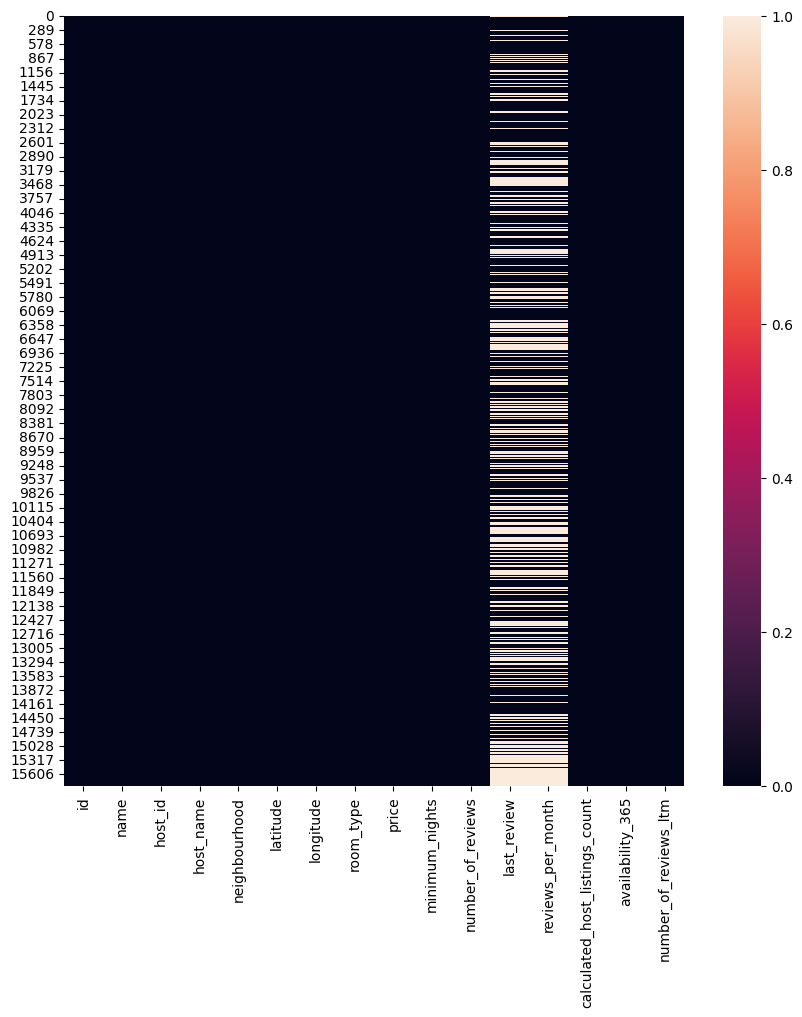

In [75]:
plt.figure(figsize = (10, 10))
sns.heatmap(df[df.columns].isna())

In [76]:
for col in df.columns:
    if (df[df[col].isna()].shape[0] > 0):
        display(f'data hilang pada kolom {col}', df[df[col].isna()])

'data hilang pada kolom name'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


'data hilang pada kolom host_name'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


'data hilang pada kolom last_review'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


'data hilang pada kolom reviews_per_month'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0


Dengan mempertimbangkan bahwa terdapat data hilang yang tidak acak sama sekali (dua kolom `number_of_reviews` dan `reviews_per_month` sangat berkaitan tergantung banyaknya ulasan, tidak ada ulasan akan memunculkan nilai NaN pada kolom jumlah ulasan per bulan yang disebutkan), serta kolom `name` dan `host_name` tidak memengaruhi analisis inferensial, serta sebisa mungkin data numerik yang akan berpengaruh ingin dipertahankan, Pengisian semua data hilang tersebut menjadi langkah yang terpilih.

Untuk kolom `reviews_per_month`, data hilang pada kolom tersebut bisa langsung diisi dengan 0 mengingat data NaN ini muncul karena tidak ada ulasan yang didapat pada *listing* tersebut dan berikut adalah tampilan sesudah pengisian pada kolom tersebut.

In [77]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
display(df)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.00,14,365,0


Berikut adalah persentase data yang hilang setelah pengisian pada kolom `reviews_per_month`.

In [78]:
display(df.isna().sum()/df.shape[0]*100)

id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.006308 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 0.000000 
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

Untuk kolom `last_review`, dengan menimbang bahwa kolom ini nantinya tidak diperlukan lagi, nilai yang hilang pada kolom ini cukup diisi dengan 0 saja untuk sementara dengan *running code* seperti berikut:

In [79]:
df['last_review'] = df['last_review'].fillna(0)
display(df)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


Berikut adalah persentase data yang hilang setelah pengisian pada kolom `reviews_per_month`.

In [80]:
display(df.isna().sum()/df.shape[0]*100)

id                                0.000000
name                              0.050460
host_id                           0.000000
host_name                         0.006308
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

Untuk kolom `name`, data hilang pada kolom tersebut bisa langsung diisi dengan host name pada baris yang sama, mengingat bahwa pada kasus ini data yang hilang bersifat unik dan tidak berhubungan dengan variabel lain, serta pada data yang hilang di kolom ini, kolom `host_name` masih terisi semua. Berikut adalah tampilan sesudah pengisian pada kolom tersebut.

In [81]:
df['name'] = df['name'].fillna(df['host_name'])
display(df)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


Berikut adalah persentase data yang hilang setelah pengisian pada kolom `name`.

In [82]:
display(df.isna().sum()/df.shape[0]*100)

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.006308
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

Untuk kolom `host_name`, hal yang resiprokal dengan kasus di kolom `name` menjadi langkah yang dijalankan. Sata hilang pada kolom tersebut bisa langsung diisi dengan `name` pada baris yang sama, mengingat bahwa pada kasus ini data yang hilang bersifat unik dan tidak berhubungan dengan variabel lain, serta pada data yang hilang di kolom ini, kolom `name` masih terisi semua. Berikut adalah tampilan sesudah pengisian pada kolom tersebut.

In [83]:
df['host_name'] = df['host_name'].fillna(df['name'])
display(df)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


Berikut adalah persentase data yang hilang setelah pengisian pada kolom `host_name`, dan dengan demikian tidak ada data kosong yang tersisa.

In [84]:
display(df.isna().sum()/df.shape[0]*100)

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
dtype: float64

### Data Terduplikasi

Sebelum memilah data yang bisa diambil untuk dianalisis, langkah ini cukup krusial untuk memastikan tidak ada data ganda pada *data set* dengan *running* kode berikut dengan pertimbangan tidak perlu semua kolom dipilah, karena bisa saja data terduplikasi karena input berlebih, sehingga terdapat dua data persis dengan id *listing* berbeda:

In [85]:
display(df[df.duplicated(subset = [
    'name',
    'host_id',
    'host_name',
    'neighbourhood',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'number_of_reviews_ltm'], keep = False)])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5890,28831409,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,0,0.0,9,361,0
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,0,0.0,9,361,0
8789,37953702,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,0,0.0,4,180,0
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,0,0.0,4,180,0
15183,765632824291529126,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,0,0.0,44,340,0
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,0,0.0,44,340,0
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,0,0.0,40,340,0
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,0,0.0,40,340,0
15549,781507744450884041,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,0,0.0,33,360,0
15550,781514912980696908,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,0,0.0,33,360,0


Karena hasil pengecekan menunjukkan ada data terduplikasi, langkah selanjutnya ialah penghapusan data tersebut.

In [86]:
df = df.drop_duplicates(subset = [
    'name',
    'host_id',
    'host_name',
    'neighbourhood',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'number_of_reviews_ltm'], keep = 'first', ignore_index = False)
display(df)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


Sehingga, terdapat 7 baris dengan data duplikat yang dihapus, dan bersisa 15.847 baris.

### Data Anomali

Setelah membersihkan data yang invalid secara masukan, pembersihan data juga melibatkan inspeksi terhadap kelogisan data yang tersedia. Anomali yang memungkinkan dari seluruh kolom yang melibatkan kelogisan nilai yang terkandung ialah:
* kolom `price` memuat harga sewa *listing* sebesar 0 (bisa saja dipengaruhi promo saat mendaftarkan *listing*).
* kolom `minimum_nights` memuat angka lebih dari 90 malam sebagai standar penyewaan jangka panjang di Airbnb. Namun, karena hal ini bisa disebabkan oleh tidak ada pengaturan dari mitra dalam jumlah malam minimum bagi penyewaan *listing*-nya, kasus ini hanya cukup sekedar diidentifikasi saja.
* kolom `availability_365` memuat jumlah hari lebih dari 365 hari.

Untuk pengecekannya, bisa dilakukan inspeksi kelogisan data dengan cara berikut:

In [87]:
display('illogical price')
display(df[df['price'] == 0])

display('illogical minimum_nights')
display(df[df['minimum_nights'] > 0])

display('illogical availability_365')
display(df[df['availability_365'] > 365])

'illogical price'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0,0.0,1,0,0


'illogical minimum_nights'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


'illogical availability_365'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


Untuk kolom `minimum_nights`, dengan preseden tidak ada penggantian nilai, tidak ada perlakuan apa pun untuk pembersihan data mengenai ketidaklogisan nilai yang ada.

Ternyata, ada satu datum yang tidak logis karena harga sewanya 0 Baht, untuk mengatasi hal ini, dipilihlah satu titik *central tendency* yang cocok, dengan menimbang uji normalitas pada tahapan sebelumnya, nilai yang cocok untuk menggantikan nilai 0 tersebut ialah median harga. Untuk pembuktian mendetail mengapa kolom `price` terdistribusi secara tidak normal, dari distribusi harga *listing* keseluruhan hingga distribusi harga *listing* berupa hotel, penjabarannya bisa dilihat secara seksama pada beberapa tampilan di bawah ini:

<Axes: ylabel='price'>

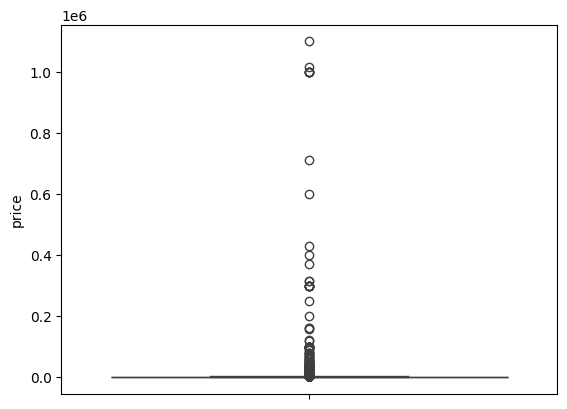

In [88]:
display(sns.boxplot(df['price']))

In [89]:
dp_statistic, df_pvalue = normaltest(df['price'])

if df_pvalue > 0.05:
    display(f'P-Value: {df_pvalue}. Bisa diasumsikan distribusi normal')
else:
    display(f'P-Value: {df_pvalue}. Tidak bisa diasumsikan distribusi normal')

'P-Value: 0.0. Tidak bisa diasumsikan distribusi normal'

In [90]:
dp_statistic, df_pvalue = normaltest(df[df['room_type'] == 'Hotel room']['price'])

if df_pvalue > 0.05:
    display(f'P-Value: {df_pvalue}. Bisa diasumsikan distribusi normal')
else:
    display(f'P-Value: {df_pvalue}. Tidak bisa diasumsikan distribusi normal')

'P-Value: 0.0. Tidak bisa diasumsikan distribusi normal'

Karena tidak bisa diasumsikan distribusi normal, titik *central tendency* yang dipakai ialah median, kesimpulan yang didapat ialah dipilihlah antara median harga keseluruhan dan median harga hotel. Untuk mendekati realita yang ada, titik median yang dipakai ialah median harga hotel, sehingga:

In [91]:
medianHotelPrice = df[df['room_type'] == 'Hotel room']['price'].median()
df.loc[df['price'] == 0, 'price'] = medianHotelPrice
display(df[df['host_name'] == 'Somerset Maison Asoke'])

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,1700,1,0,0,0.0,1,0,0


### Data Outlier

*Outlier* perlu dipertimbangkan jika data akan digunakan dalam menentukan prediksi, namun pada kasus ini dengan kejaran berupa sekedar *data wrangling*, proses ini cukup melibatkan identifikasi *outlier* terlebih dahulu, sebelum memutuskan keperluan imputasi atau delesi data terdampak.

In [92]:
for column in df_numeric_columns:
    if (column not in ['id', 'host_id', 'latitude', 'longitude']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lowerBorder = Q1 - 1.5 * IQR
        upperBorder = Q3 + 1.5 * IQR
        display(f'outliers in {column}, size: {df[(df[col] <= lowerBorder) | (df[col] >= upperBorder)].shape[0]}, percentage: {round(df[(df[col] <= lowerBorder) | (df[col] >= upperBorder)].shape[0] / df.shape[0] * 100, 2)} %')
        display(df[(df[col] <= lowerBorder) | (df[col] >= upperBorder)])

df_numeric = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(df_numeric))
df_no_outliers = df[(z_scores < 3).all(axis=1)]
display(f'df without outliers, size: {df_no_outliers.shape[0]}, percentage: {round(df_no_outliers.shape[0] / df.shape[0] * 100, 2)} %')
display(df_no_outliers)
display(f'outliers found at least in one column, size: {df.shape[0] - df_no_outliers.shape[0]}, percentage: {round((df.shape[0] - df_no_outliers.shape[0]) / df.shape[0] * 100, 2)} %')

'outliers in price, size: 0, percentage: 0.0 %'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


'outliers in minimum_nights, size: 1023, percentage: 6.46 %'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
53,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,2022-12-15 00:00:00,4.02,7,320,29
72,1943048,"Best nr Chatujak, MRT, BTS free wifi&fNetflix",9906827,Nokiko,Chatu Chak,13.816940,100.564510,Entire home/apt,1271,1,293,2022-12-06 00:00:00,2.72,1,129,19
106,1982413,Hip Studio ♥ Of BKK+River+BTS+WIFI,3346331,Bee,Sathon,13.712780,100.515600,Entire home/apt,811,2,404,2022-12-15 00:00:00,3.67,7,304,19
116,1160838,Spacious 2 Bedroom Apartment near BTS-non smoking,1513875,Suchada,Phaya Thai,13.773600,100.540790,Entire home/apt,2571,3,109,2022-12-18 00:00:00,1.15,4,342,56
120,1208204,Deluxe Condo at perfect location 2-0,766443,Gerd,Vadhana,13.737570,100.559960,Entire home/apt,1485,3,206,2022-12-14 00:00:00,1.83,3,130,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14407,726555865659194592,1-bedroom apartment sukhumvit (BTS walk-distance),171603843,Arisudan Gopal,Suanluang,13.709850,100.606250,Entire home/apt,650,1,18,2022-12-22 00:00:00,6.51,11,302,18
14504,735320113093591079,17-曼谷市中心豪华温泉酒店公寓 bts thonglo 本地小吃市场免费泳池 健身房,402093105,Hi Gravity,Khlong Toei,13.722750,100.572730,Entire home/apt,1581,7,20,2022-12-14 00:00:00,8.22,45,241,20
14847,754907399713834456,2BR-BTS Ekamai-100inch projector-Infinity Pool Gym,106371215,Kk,Khlong Toei,13.717870,100.584070,Entire home/apt,3676,1,21,2022-12-22 00:00:00,12.60,4,323,21
14894,755714540112573205,2BR-BTS Ekamai 300m-Sky Infinity Pool&Gym-tub,106371215,Kk,Khlong Toei,13.715660,100.583810,Entire home/apt,4102,1,17,2022-12-25 00:00:00,10.85,4,346,17


'outliers in number_of_reviews, size: 257, percentage: 1.62 %'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
116,1160838,Spacious 2 Bedroom Apartment near BTS-non smoking,1513875,Suchada,Phaya Thai,13.773600,100.540790,Entire home/apt,2571,3,109,2022-12-18 00:00:00,1.15,4,342,56
193,858311,"River view penthouse 30 Fl, 5 Pers, taxi included",4491588,Donald,Khlong San,13.721350,100.508000,Entire home/apt,7929,2,256,2022-12-15 00:00:00,2.13,1,267,43
375,3794264,Sitara Place Serviced Apartment and Hotel,19484732,Sitara,Din Daeng,13.764796,100.564781,Entire home/apt,990,1,302,2022-12-28 00:00:00,3.38,1,360,277
484,3480807,Benviar - Three Bedroom Suite(225 Sqm) @Chitlom,17499526,Benjamin,Parthum Wan,13.740340,100.545550,Entire home/apt,17265,1,344,2022-12-27 00:00:00,3.38,7,351,59
516,3611516,Benviar - Three Bedroom Duplex (275 sqm) @Chitlom,17499526,Benjamin,Parthum Wan,13.741700,100.545820,Entire home/apt,19276,1,111,2022-12-21 00:00:00,1.13,7,324,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,640493624884896939,Sukhumvit 1-bedroom apartment GP House - COZY,171603843,Arisudan Gopal,Suanluang,13.708720,100.605790,Entire home/apt,650,1,37,2022-12-27 00:00:00,5.58,11,303,37
13168,623699400990285914,1网红50层超豪华空中泳池健身房Asoke商圈市中心双轨BTS/MRT+Nana/Soicowboy,129986395,Ed,Vadhana,13.739680,100.562670,Entire home/apt,2150,1,33,2022-11-24 00:00:00,4.67,13,278,33
13172,624225259936181515,CENTRAL & CLASSY ※ 5-min Skytrain ASOK ※ NICE POOL,30386490,N'Dee,Khlong Toei,13.736320,100.558840,Entire home/apt,4950,1,34,2022-12-21 00:00:00,4.47,23,40,34
13177,656164225695350804,1 Bedroom Suite [Silom-Sathorn],340150263,Bandara,Bang Rak,13.725810,100.538228,Private room,3571,1,101,2022-12-14 00:00:00,17.41,18,304,101


'outliers in reviews_per_month, size: 5152, percentage: 32.51 %'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2022-11-22 00:00:00,2.59,1,349,3
28,145343,Boutique Rooms Near Bangkok Airport,703944,Parinya,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,2022-11-25 00:00:00,0.28,1,349,13
30,156583,Studio near Chula University/Silom walk to MRT/BTS,58920,Gael,Bang Rak,13.728500,100.523130,Entire home/apt,1176,7,63,2022-11-25 00:00:00,0.47,2,95,2
32,159854,Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7,766443,Gerd,Vadhana,13.742930,100.556030,Entire home/apt,1659,3,212,2022-12-08 00:00:00,1.58,3,207,7
33,976690,Beautiful 1 BR apartment @BTS Ari,5344120,Nattavut,Phaya Thai,13.779310,100.542620,Entire home/apt,1400,15,90,2022-11-15 00:00:00,0.77,4,336,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15633,784801495543432870,3- Life AsokeHype-mrt rame9 500m -Infinity pool,402093105,Hi Gravity,Ratchathewi,13.754910,100.562530,Entire home/apt,2328,15,5,2022-12-21 00:00:00,5.00,45,352,5
15639,783697331606131203,Specia offer!Free pool&WIFI-Asok/SukhumvitBTS! 4PP,485536928,Lucas,Khlong Toei,13.734856,100.557960,Entire home/apt,3396,1,2,2022-12-21 00:00:00,2.00,4,343,2
15743,786248090308669514,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.730126,100.586369,Entire home/apt,3932,1,3,2022-12-24 00:00:00,3.00,8,349,3
15744,786318268883527580,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.729880,100.586269,Entire home/apt,4285,28,3,2022-12-28 00:00:00,3.00,8,365,3


'outliers in calculated_host_listings_count, size: 308, percentage: 1.94 %'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
116,1160838,Spacious 2 Bedroom Apartment near BTS-non smoking,1513875,Suchada,Phaya Thai,13.773600,100.540790,Entire home/apt,2571,3,109,2022-12-18 00:00:00,1.15,4,342,56
193,858311,"River view penthouse 30 Fl, 5 Pers, taxi included",4491588,Donald,Khlong San,13.721350,100.508000,Entire home/apt,7929,2,256,2022-12-15 00:00:00,2.13,1,267,43
375,3794264,Sitara Place Serviced Apartment and Hotel,19484732,Sitara,Din Daeng,13.764796,100.564781,Entire home/apt,990,1,302,2022-12-28 00:00:00,3.38,1,360,277
484,3480807,Benviar - Three Bedroom Suite(225 Sqm) @Chitlom,17499526,Benjamin,Parthum Wan,13.740340,100.545550,Entire home/apt,17265,1,344,2022-12-27 00:00:00,3.38,7,351,59
516,3611516,Benviar - Three Bedroom Duplex (275 sqm) @Chitlom,17499526,Benjamin,Parthum Wan,13.741700,100.545820,Entire home/apt,19276,1,111,2022-12-21 00:00:00,1.13,7,324,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13177,656164225695350804,1 Bedroom Suite [Silom-Sathorn],340150263,Bandara,Bang Rak,13.725810,100.538228,Private room,3571,1,101,2022-12-14 00:00:00,17.41,18,304,101
13380,677146674393948767,"Bangkok Condo@ MRT RAMA9, Jodd Fairs Night Market",190787387,Wong,Huai Khwang,13.754720,100.568210,Entire home/apt,1070,2,31,2022-12-15 00:00:00,5.92,2,147,31
13463,673580071140397283,2网红50层超豪华空中泳池健身房Asoke商圈市中心双轨BTS/MRT+Nana/Soicowboy,129986395,Ed,Vadhana,13.740170,100.561970,Entire home/apt,4200,1,32,2022-12-23 00:00:00,6.44,13,322,32
13954,693784162663673421,3网红50层超豪华空中泳池健身房Asoke商圈市中心双轨BTS/MRT+Nana/Soicowboy,129986395,Ed,Vadhana,13.739620,100.560630,Entire home/apt,2150,1,31,2022-12-20 00:00:00,7.50,13,309,31


'outliers in availability_365, size: 0, percentage: 0.0 %'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


'outliers in number_of_reviews_ltm, size: 2219, percentage: 14.0 %'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
28,145343,Boutique Rooms Near Bangkok Airport,703944,Parinya,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,2022-11-25 00:00:00,0.28,1,349,13
43,988373,BangLuang House 2@ Bangkok Thailand,5325919,วสวัตติ์,Phasi Charoen,13.731220,100.462280,Entire home/apt,1795,1,95,2022-12-15 00:00:00,0.80,3,339,10
47,1862377,☞Downtown Central Studio-Bangkok MRT,8214044,Evan From Sanctuary House,Sathon,13.720630,100.546940,Entire home/apt,1200,1,310,2022-12-11 00:00:00,3.00,8,331,9
49,1887544,"""Serviced 2 Bed Scenic SkyVillas""",6132593,Salvatore,Sathon,13.720960,100.529110,Entire home/apt,3757,2,118,2022-11-30 00:00:00,1.07,7,134,12
53,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.711920,100.515350,Entire home/apt,866,2,472,2022-12-15 00:00:00,4.02,7,320,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,750360890702349752,Bangkok Cheesy room by The Locals - (newly opened),483119696,The Locals,Phra Nakhon,13.758960,100.492380,Entire home/apt,1223,1,15,2022-12-26 00:00:00,8.65,10,300,15
14903,750391908732827657,Bangkok Cheesy room by The Locals - (newly opened),483119696,The Locals,Phra Nakhon,13.760595,100.492367,Entire home/apt,1322,1,13,2022-12-25 00:00:00,7.80,10,312,13
14904,750392237778434745,Bangkok The locals - Ideal room for family/friends,483119696,The Locals,Phra Nakhon,13.760731,100.492206,Entire home/apt,1537,1,15,2022-12-15 00:00:00,8.49,10,302,15
14918,751025303076300052,Breathtaking River View 5min walk-train cozy room,315867023,Alex,Bang Rak,13.723820,100.524260,Entire home/apt,3683,2,8,2022-12-18 00:00:00,5.71,3,306,8


'df without outliers, size: 13831, percentage: 87.28 %'

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


'outliers found at least in one column, size: 2016, percentage: 12.72 %'

Jadi, temuan baru dapat terungkap bahwa setidaknya 12,72 % dari jumlah baris keseluruhan mengandung data *outlier*. Dengan preseden bahwa pada kasus ini, tidak ada pertimbangan kemungkinan model akan dipakai untuk prediksi berupa pemodelan, pembersihan data terkait *outlier* tidak terdapat dalam proses *data wrangling* ini dan adanya *outlier* pada setiap kolom hanya untuk diidentifikasi terlebih dahulu. Dengan demikian, set data bisa divonis telah mengikuti segala jenis identifikasi dan penanganan pada setiap kasus yang diamati untuk dibersihkan.

### Data Tak Diperlukan

Untuk menghapus beberapa kolom yang dijabarkan di atas, bisa dilakukan *running* kode berikut:

In [93]:
df = df.drop(columns = ['id', 'host_id', 'last_review'])
display(df)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0.00,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0


### Data Setelah Pembersihan

Untuk pemastian bahwa data telah dibersihkan, berikut tampilan deskripsi singkat *data set* pasca-pembersihan dengan membuat *dummy dataframe*:

In [94]:
display(df)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0.00,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0.00,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0.00,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0.00,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0.00,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0.00,14,365,0


In [95]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), list(df[col].drop_duplicates().sample(3).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'], data = listItem)
display(dfDesc)

,dataFeatures,dataType,null,unique,uniqueSample
0,name,object,0,14802,"[Modern room near Khaosan/Grand Palace up to 4Per., Ideal location 8-bed room with private bathroomA/C, The Seed Musee Sukhumvit 26]"
1,host_name,object,0,5313,"[Nacharot, Golf, Ladda]"
2,neighbourhood,category,0,50,"[Bang Na, Bang Bon, Phasi Charoen]"
3,latitude,float64,0,9606,"[13.73541, 13.71963, 13.75222]"
4,longitude,float64,0,10224,"[100.58142, 100.57737, 100.59049525767216]"
5,room_type,category,0,4,"[Hotel room, Private room, Entire home/apt]"
6,price,int64,0,3039,"[710, 3331, 1129]"
7,minimum_nights,int64,0,86,"[148, 270, 22]"
8,number_of_reviews,int64,0,298,"[147, 406, 159]"
9,reviews_per_month,float64,0,514,"[5.41, 4.18, 3.23]"


Dapat disimpulkan bahwa dalam proses pembersihan, terdapat 3 kolom/fitur dan 7 baris/data yang telah dihapus.

### Ekspor Data Pasca-Pembersihan

Data yang telah dibersihkan sebelumnya bisa dikonversi kembali menjadi *file* baru berekstensi CSV agar bisa dipakai baik untuk analisis maupun untuk visualisasi pada masa mendatang. Untuk pengerjaan analisis ini, nantinya *file* tersebut akan digunakan dalam visualisasi dengan Tableau.

In [102]:
df.to_csv('airbnb-listings-bangkok-cleaned.csv', index = False)

## Analisis Data Eksplorasi Pasca-Pembersihan

Pada bagian ini, serangkaian ekstrasi informasi dilakukan kembali mengingat telah ada pembersihan data sebelumnya untuk mengambil baik secara deskriptif maupun secara inferensial. Terdapat beberapa rangkaian prosesi yakni *data profiling* dan uji normalitas baik dengan visualisasi maupun dengan uji statistik.

### Cek Statistik Deskriptif

Untuk menarik titik tendensi penting pada setiap fitur di data, *running code* yang digunakan ialah sebagai berikut:

In [96]:
display(df.describe(), df.describe(include='object'))

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15847.000000,15847.000000,1.584700e+04,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000
mean,13.745135,100.559910,3.218381e+03,15.298416,16.661513,0.516406,13.884142,244.341390,3.483057
std,0.043024,0.050917,2.497761e+04,50.825421,40.620792,0.952902,30.273660,125.851924,8.918606
min,13.527300,100.329550,2.780000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,13.738490,100.561420,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,13.759495,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name
count,15847,15847
unique,14802,5313
top,New! La Chada Night Market studio 2PPL near MRT,Curry
freq,45,228


### Uji Normalitas dengan Tes Statistik

Uji normalitas dijalankan kembali untuk mengetahui distribusi data, tentunya dengan prosedur yang sama dengan kondisi pra-pembersihan.

In [97]:
df_postcleaning_numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

result = {'column': [], 'p-value': [], 'normality': []}

for column in df_postcleaning_numeric_columns:
    if (column not in ['id', 'host_id', 'latitude', 'longitude']):
        dp_statistic, df_pvalue = normaltest(df[column].dropna())
        result['column'].append(column)
        result['p-value'].append(df_pvalue)
        result['normality'].append('not normal' if df_pvalue < 0.05 else 'normal')

display(pd.DataFrame(result))

,column,p-value,normality
0,price,0.0,not normal
1,minimum_nights,0.0,not normal
2,number_of_reviews,0.0,not normal
3,reviews_per_month,0.0,not normal
4,calculated_host_listings_count,0.0,not normal
5,availability_365,0.0,not normal
6,number_of_reviews_ltm,0.0,not normal


Kesimpulan yang bisa diambil juga masih sama, yakni semua distribusi pada setiap fitur bersifat tidak normal.

### Uji Normalitas dengan Visualisasi

Selain uji statisik, tes kenormalan distribusi yang telah dibersihkan bisa dipantau via tampilan frekuensi data yang bisa di-*plot* baik dalam bentuk histogram maupun dalam bentuk *boxplot* yang bisa dicek pada tampilan di bawah ini.

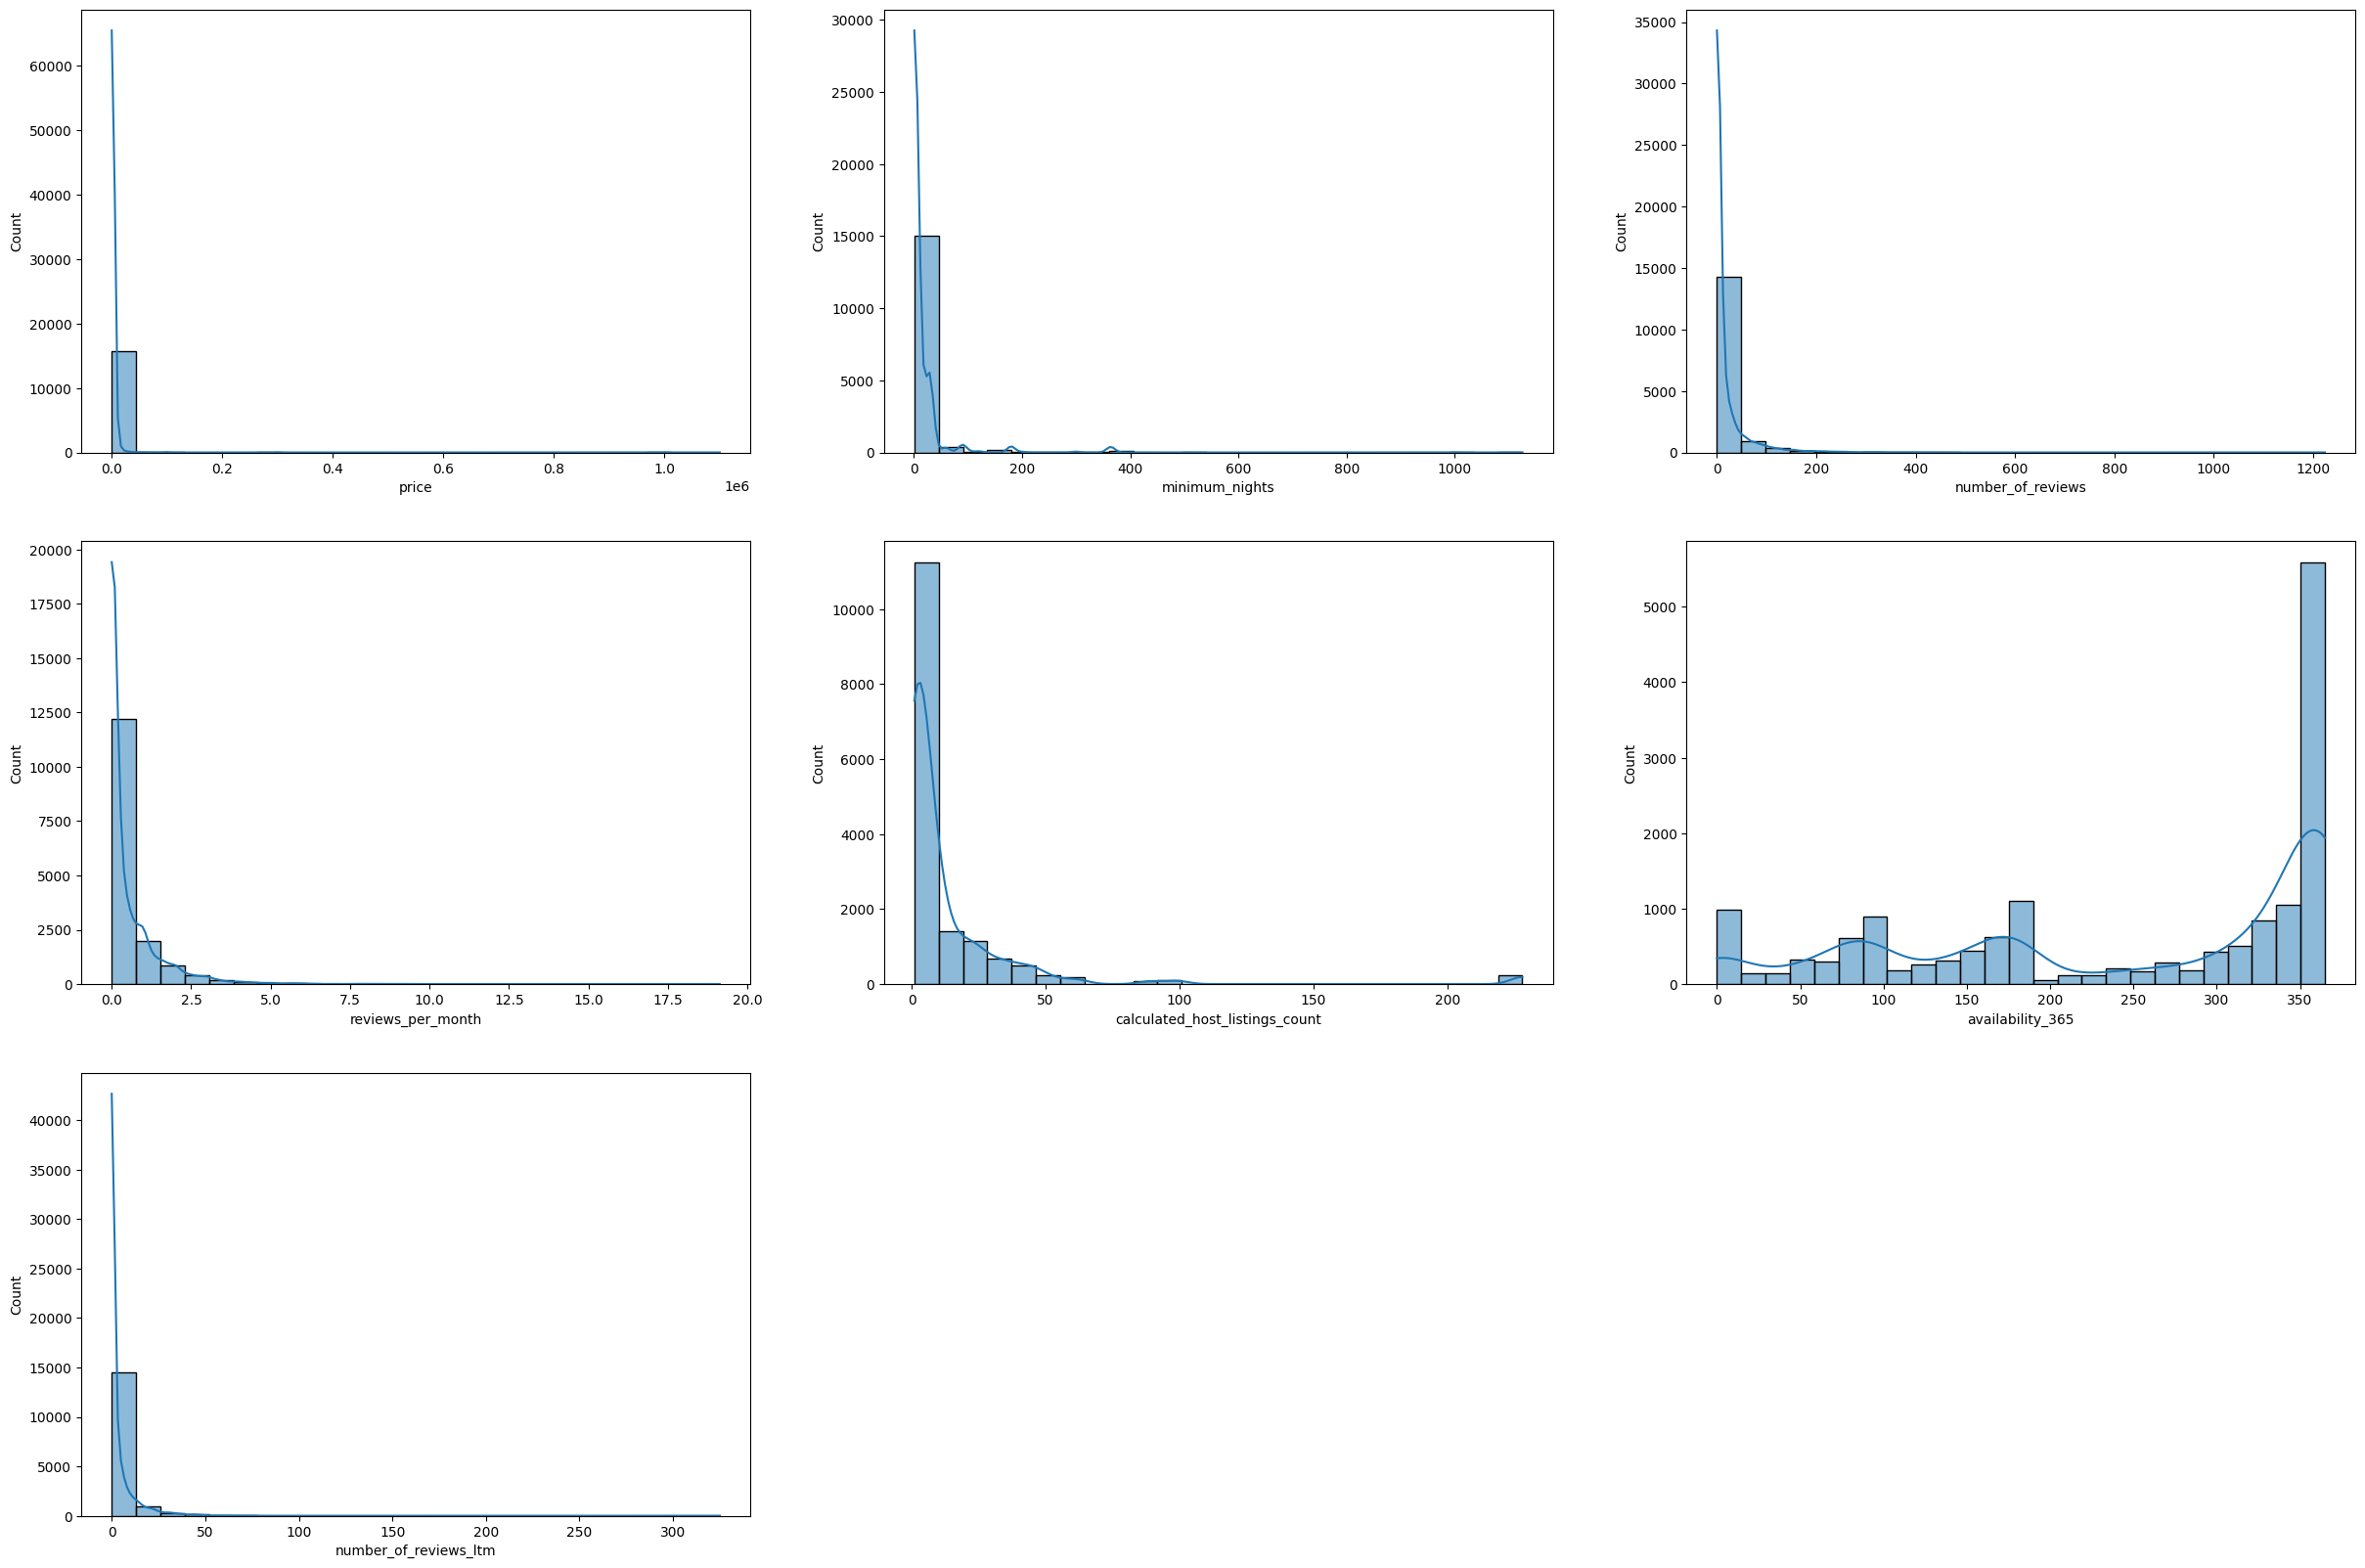

In [99]:
fig, axes = plt.subplots(3, 3, figsize = (30, 20))
plotPoint = 0

for column in df_numeric_columns:
    if (column not in ['id', 'host_id', 'latitude', 'longitude']):
        rowNum = plotPoint // 3
        colNum = plotPoint % 3
        sns.histplot(data = df[column].dropna(), kde = True, ax = axes[rowNum, colNum], bins = 25)
        plotPoint += 1
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.show()

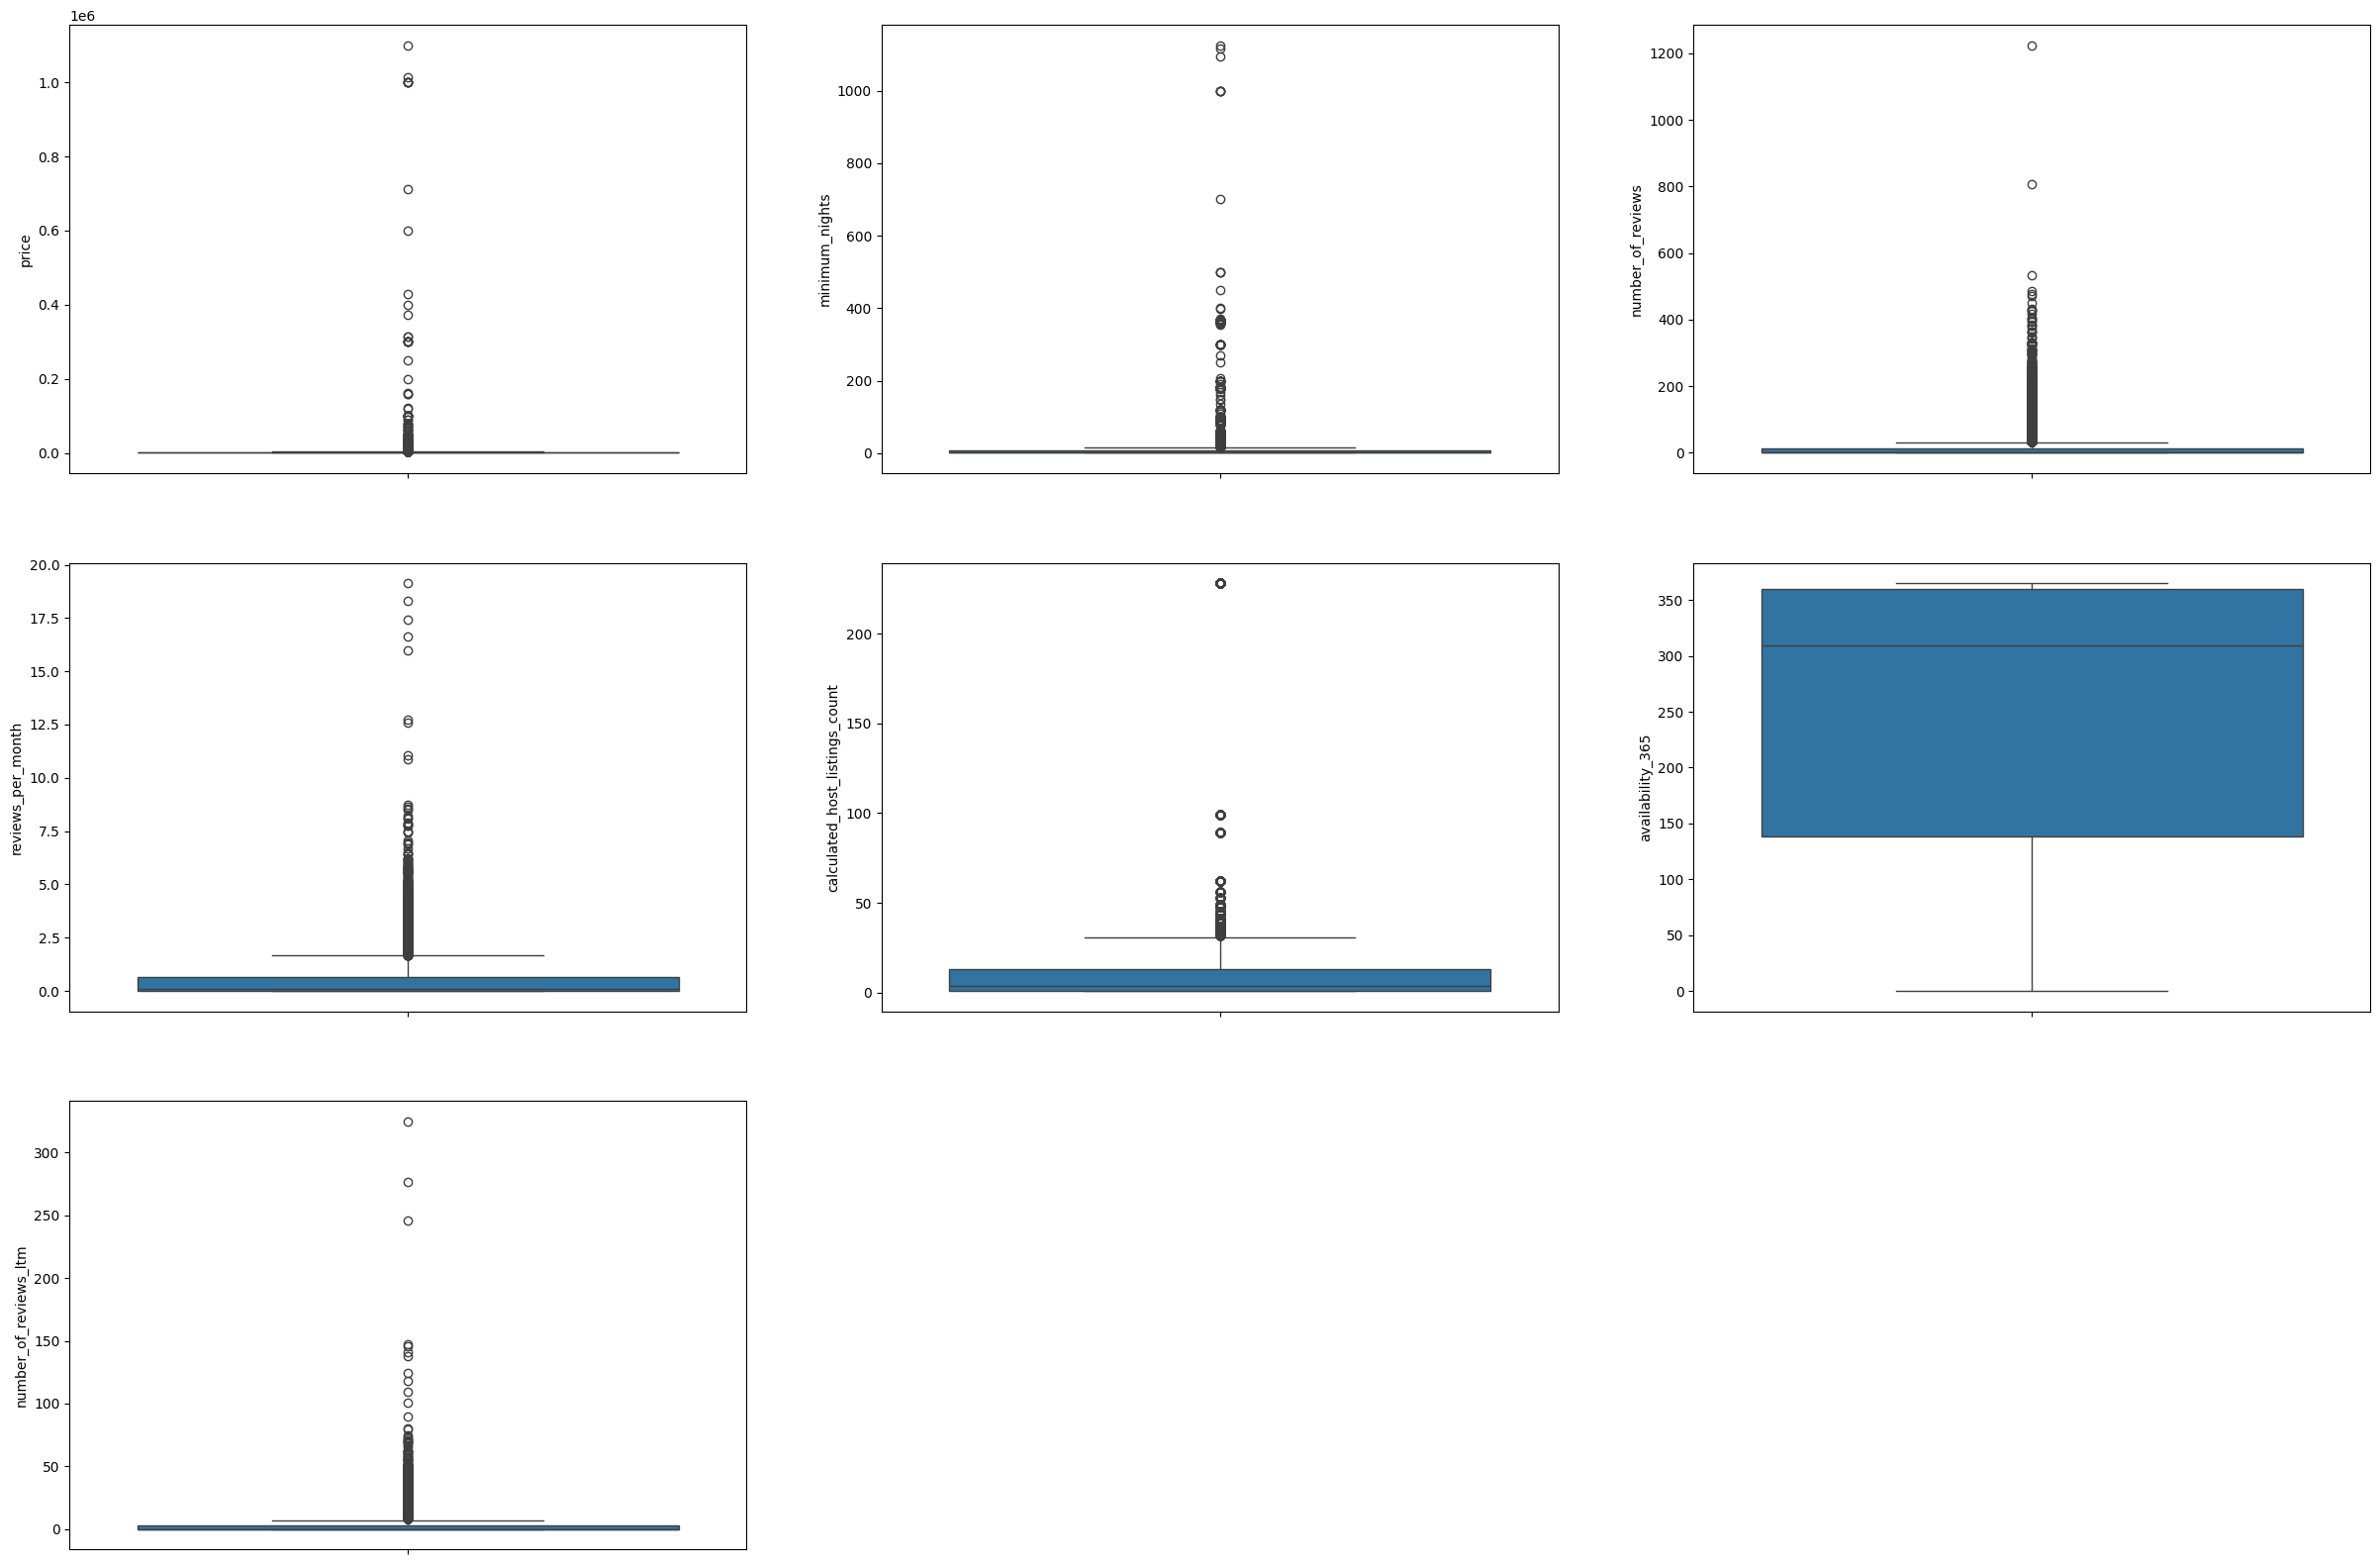

In [100]:
fig, axes = plt.subplots(3, 3, figsize = (30, 20))
plotPoint = 0

for column in df_numeric_columns:
    if (column not in ['id', 'host_id', 'latitude', 'longitude']):
        rowNum = plotPoint // 3
        colNum = plotPoint % 3
        sns.boxplot(data = df[column].dropna(), ax = axes[rowNum, colNum])
        plotPoint += 1
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.show()

Dengan demikian, tidak ada perbedaan signifikan dalam aspek distribusi data antara pada kondisi pra-pembersihan dan pada kondisi pasca-pembersihan. Semua data pada kolom numerik terdistribusi secara tidak normal.

## Analisis Data